In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

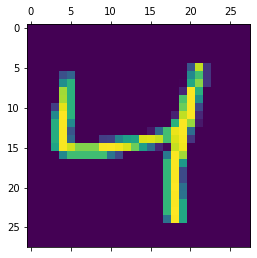

In [7]:
plt.matshow(X_train[2])

In [8]:
y_train[2]

4

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train = X_train/255
X_test = X_test/255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [12]:
X_test_flattened.shape

(10000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784, ), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4709 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9258


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2704 - accuracy: 0.9248


[0.2704195976257324, 0.9247999787330627]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.94473171e-02, 3.12970002e-07, 6.68317974e-02, 9.71352637e-01,
       2.37849355e-03, 1.13164186e-01, 2.17699267e-06, 9.99792099e-01,
       1.01037145e-01, 6.72541142e-01], dtype=float32)

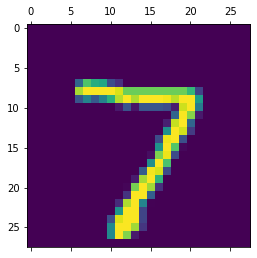

In [18]:
plt.matshow(X_test[0])

In [19]:
max = np.max(y_predicted[0])

In [20]:
max

0.9997921

In [22]:
np.argmax(y_predicted[0])

7

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   8,    9,  926,   19,    7,    2,   13,   10,   33,    5],
       [   4,    0,   18,  941,    1,   13,    2,    7,   16,    8],
       [   1,    1,    5,    2,  911,    0,   12,    3,    8,   39],
       [  11,    2,    5,   46,   10,  759,   17,    6,   30,    6],
       [  11,    3,    7,    1,    7,   10,  916,    2,    1,    0],
       [   1,    5,   24,   10,    9,    0,    0,  940,    3,   36],
       [   7,   10,    7,   35,    9,   29,   11,    9,  849,    8],
       [  10,    7,    2,   15,   26,    5,    0,   14,    4,  926]])>

Text(69.0, 0.5, 'Truth')

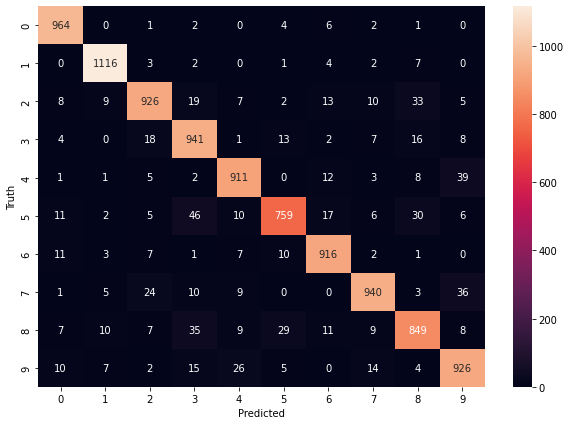

In [26]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784, ), activation = 'relu'),
    keras.layers.Dense(10, input_shape = (784, ), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2635 - accuracy: 0.9249
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1220 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0862 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0519 - accuracy: 0.9840


In [28]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0815 - accuracy: 0.9756


[0.08153513073921204, 0.975600004196167]

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, input_shape = (784, ), activation = 'relu'),
    keras.layers.Dense(10, input_shape = (784, ), activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2768 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1263 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0877 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0673 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0533 - accuracy: 0.9833
